In [69]:
import numpy as np
import pandas as pd
import sys
import math 
sys.path.insert(1, sys.path[0].replace('analysis', 'src'))
from linear_regression import LinearRegressor
from matrix import Matrix

In [70]:
data = [(0.0, 7.0), (0.2, 5.6), (0.4, 3.56), (0.6, 1.23), (0.8, -1.03),
 (1.0, -2.89), (1.2, -4.06), (1.4, -4.39), (1.6, -3.88), (1.8, -2.64),
 (2.0, -0.92), (2.2, 0.95), (2.4, 2.63), (2.6, 3.79), (2.8, 4.22),
 (3.0, 3.8), (3.2, 2.56), (3.4, 0.68), (3.6, -1.58), (3.8, -3.84),
 (4.0, -5.76), (4.2, -7.01), (4.4, -7.38), (4.6, -6.76), (4.8, -5.22)]

data_matrix = Matrix(data)
y_values_matrix = Matrix([[data_matrix.elements[i][data_matrix.num_cols - 1]] for i in range(0,data_matrix.num_rows)])

constants = []
for i in range(len(data)):
    x = data[i][0]
    row = [math.sin(x), math.cos(x), math.sin(2 * x), math.cos(2 * x)]
    constants.append(row)

constant_matrix = Matrix(constants)
constant_transpose = constant_matrix.transpose()
    

In [71]:
pseudoinverse = ((constant_transpose @ constant_matrix).inverse()) @ constant_transpose @ y_values_matrix
constant_values = [pseudoinverse.elements[i][0] for i in range(0, pseudoinverse.num_rows)]

[0.9987714718466099, 2.000855468831855, -3.0006300919504056, 5.000550805490717]


In [72]:
def predict_values(x): 
    sum = (constant_values[0] * math.sin(x)) + (constant_values[1] * math.cos(x)) + (constant_values[2] * math.sin(2 * x)) + (constant_values[3] * math.cos(2 * x))
    return sum

In [73]:
x_values = [data[i][0]  for i in range(len(data))]
y_values = [data[i][1] for i in range(len(data))]
extra_x_values = [0.05 * i for i in range(4 * len(data))]
predicted_values = [predict_values(x_value) for x_value in extra_x_values]

<AxesSubplot:xlabel='x', ylabel='y_values'>

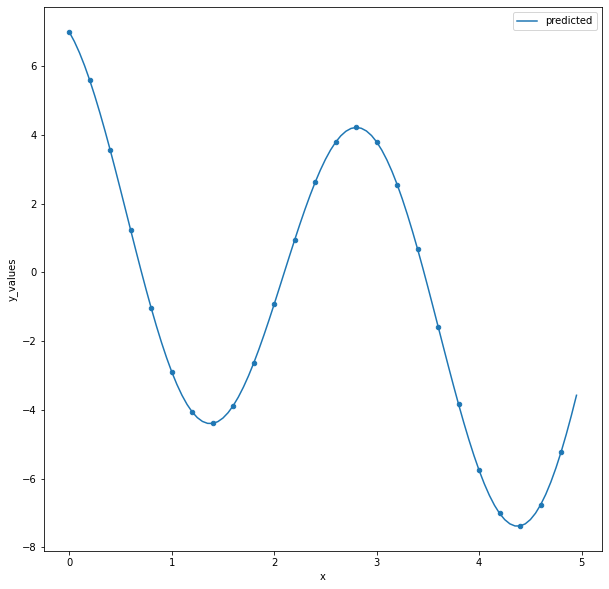

In [74]:

data_df = pd.DataFrame({'x_values': x_values,'y_values': y_values})
points = pd.DataFrame({'x': extra_x_values, 'predicted': predicted_values})

data_points = data_df.plot(x =  'x_values', y = 'y_values', kind='scatter', figsize = (10,10))
points.plot(x = 'x', y = 'predicted', ax=data_points)